In [1]:
import pandas as pd 
import numpy as np

In [4]:
df=pd.read_csv('downloads/Preprocessed_Data.csv', encoding="latin1")

In [5]:
df

,Sex,Age,Height,Weight,Low Income,Lower Middle Income,Upper Middle Income,Status
0,1,5,75,17,1,0,0,Stunting
1,0,4,101,13,1,0,0,Stunting
2,0,4,71,17,1,0,0,Stunting
3,0,3,81,13,0,0,1,Stunting
4,0,1,79,16,0,0,1,Stunting
...,...,...,...,...,...,...,...,...
832,1,2,84,16,1,0,0,Stunting
833,1,4,93,20,1,0,0,Stunting
834,0,1,74,11,1,0,0,Stunting
835,0,1,81,18,1,0,0,Stunting


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Status_Label'] = le.fit_transform(df['Status'])  # Converts to 0, 1, 2

In [7]:
df

,Sex,Age,Height,Weight,Low Income,Lower Middle Income,Upper Middle Income,Status,Status_Label
0,1,5,75,17,1,0,0,Stunting,1
1,0,4,101,13,1,0,0,Stunting,1
2,0,4,71,17,1,0,0,Stunting,1
3,0,3,81,13,0,0,1,Stunting,1
4,0,1,79,16,0,0,1,Stunting,1
...,...,...,...,...,...,...,...,...,...
832,1,2,84,16,1,0,0,Stunting,1
833,1,4,93,20,1,0,0,Stunting,1
834,0,1,74,11,1,0,0,Stunting,1
835,0,1,81,18,1,0,0,Stunting,1


In [8]:
X = df.drop(columns=['Status', 'Status_Label'])
y = df['Status_Label']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7321428571428571


In [11]:
new_sample = pd.DataFrame([{
    'Sex': 1, 'Age': 2, 'Height': 85, 'Weight': 15,
    'Low Income': 0, 'Lower Middle Income': 0, 'Upper Middle Income': 1
}])

pred = model.predict(new_sample)
print("Predicted Status:", le.inverse_transform(pred)[0])


Predicted Status: Stunting


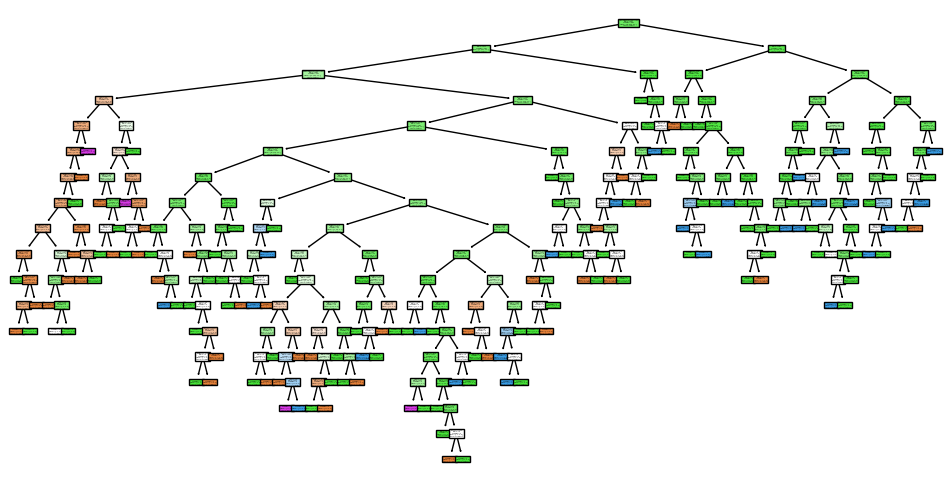

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.show()


In [14]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))



Random Forest Accuracy: 0.8392857142857143


In [18]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))



SVM Accuracy: 0.8511904761904762


In [26]:
columns = ['Sex', 'Age', 'Height', 'Weight', 'Low Income', 'Lower Middle Income', 'Upper Middle Income']
sample_input_df = pd.DataFrame([[1, 3, 18, 13, 1, 0, 0]], columns=columns)

pred_class = svm_model.predict(sample_input)
pred_label = le.inverse_transform(pred_class)

print("Predicted Status:", pred_label[0])

Predicted Status: Stunting


C:\Users\sonis\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [25]:
import pickle

with open('svm_model_mn.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

with open('label_encoder_mn.pkl', 'wb') as f:
    pickle.dump(le, f)

print("Model and label encoder exported successfully!")

Model and label encoder exported successfully!
